# Prerequisite

In [1]:
setwd('/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/data_cleaning/Cell_line_mix')

In [2]:
system('pwd', intern=TRUE)

[1] "/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/data_cleaning/Cell_line_mix"

In [3]:
system('which R', intern=TRUE)

[1] "/usr/bin/R"

In [4]:
.libPaths()

[1] "/home/siluo/Software/R"        "/usr/local/lib/R/site-library"
[3] "/usr/lib/R/site-library"       "/usr/lib/R/library"

In [ ]:
library(devtools)

In [ ]:
pkgbuild::check_build_tools(debug = TRUE)

In [ ]:
devtools::install_github("GreenleafLab/ArchR", ref="master", repos = BiocManager::repositories())
ArchR::installExtraPackages()

# Load raw data

In [5]:
suppressPackageStartupMessages({
    library(rhdf5)
    library(parallel)
    library(dplyr)
    library("BSgenome.Hsapiens.UCSC.hg19")
    library(ArchR)
    })


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [6]:
addArchRGenome("hg19")
addArchRThreads(threads = 16)

Setting default genome to Hg19.

Setting default number of Parallel threads to 16.



In [7]:
data_name <- 'Cell_line_mixing/'
input_dir <- '/home/siluo/public/SiyuanLuo/projects/benchmark/raw_data/'
output_dir <- '/home/siluo/public/SiyuanLuo/projects/benchmark/cleaned_data/'

In [8]:
# inputFiles <- c(paste0(input_dir, data_name, "GSE162690_CellLine_LowLoading.fragments.tsv.gz"))
# names(inputFiles) <- c("CellLine_LowLoading")

In [11]:
inputFiles <- c(paste0(input_dir, data_name, "GSE162690_CellLine_LowLoading.fragments.tsv.gz"), paste0(input_dir, data_name, "GSE162690_CellLine_HighLoading.fragments.tsv.gz"))
names(inputFiles) <- c("CellLine_LowLoading","CellLine_HighLoading")

In [12]:
# create arrow file, per-cell QC
ArrowFiles <- createArrowFiles(
  inputFiles = inputFiles,
  sampleNames = names(inputFiles),
  minTSS = 0,
  minFrags = 0,
  addTileMat = FALSE,
  addGeneScoreMat = FALSE,
  force = FALSE
)

Using GeneAnnotation set by addArchRGenome(Hg19)!

Using GeneAnnotation set by addArchRGenome(Hg19)!

ArchR logging to : ArchRLogs/ArchR-createArrows-833577c8232f-Date-2023-02-20_Time-16-21-54.log
If there is an issue, please report to github with logFile!

Cleaning Temporary Files

subThreadhing Disabled since ArchRLocking is TRUE see `addArchRLocking`

2023-02-20 16:21:55 : Batch Execution w/ safelapply!, 0 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-createArrows-833577c8232f-Date-2023-02-20_Time-16-21-54.log



In [13]:
# Creat ArchR project
projCellMix <- ArchRProject(
  ArrowFiles = ArrowFiles, 
  outputDirectory = "projCellMix",
  copyArrows = FALSE #This is recommended so that if you modify the Arrow files you have an original copy for later usage.
)

Using GeneAnnotation set by addArchRGenome(Hg19)!

Using GeneAnnotation set by addArchRGenome(Hg19)!

Validating Arrows...

Getting SampleNames...



Getting Cell Metadata...



Merging Cell Metadata...

Initializing ArchRProject...


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,-

In [14]:
projCellMix


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /home/siluo/public/SiyuanLuo/projects/benchmark/scripts/data_cleaning/Cell_line_mix/projCellMix 
samples(2): CellLine_HighLoading CellLine_LowLoading
sampleColData names(1): ArrowFiles
cellColData names(13): Sample TSSEnrichment ... nDiFrags BlacklistRatio
numberOfCells(1): 570440
medianTSS(1): 0
medianFrags(1): 1

# Per cell QC

**Check the QC plots to decide the threshold:**

* **High Loading Experiment**

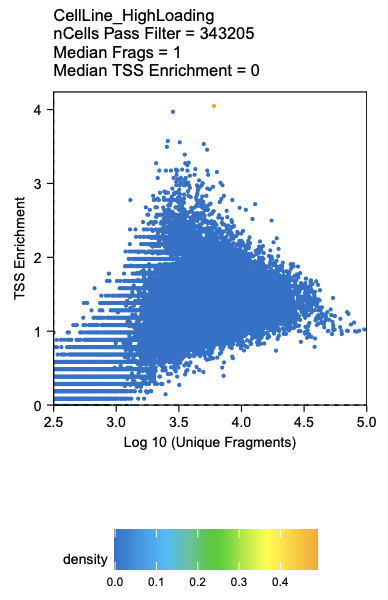

* **Low Loading Experiment**

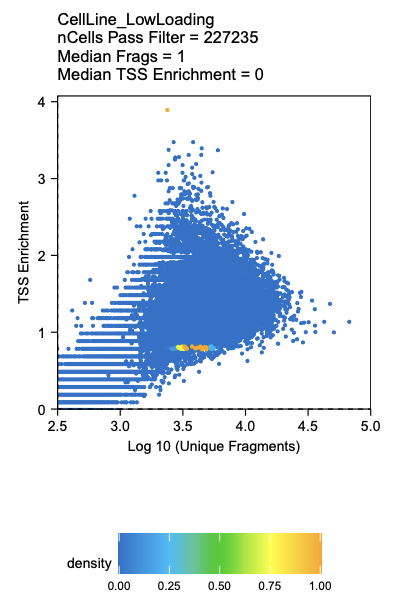

In [16]:
th_tss <- 1
th_nfrag <- 1000

In [17]:
# check cell id format
getCellColData(projCellMix)

DataFrame with 570440 rows and 13 columns
                                                      Sample TSSEnrichment
                                                 <character>     <numeric>
CellLine_HighLoading#CGCGCAACAAGCTTTG-1 CellLine_HighLoading         1.030
CellLine_HighLoading#CAGGATTTCCATCATT-1 CellLine_HighLoading         1.013
CellLine_HighLoading#CCACAGGCAACGACAG-1 CellLine_HighLoading         1.000
CellLine_HighLoading#CCGCATTGTCTCTAAG-1 CellLine_HighLoading         1.005
CellLine_HighLoading#GTTCAAGCATGGGTGA-1 CellLine_HighLoading         1.124
...                                                      ...           ...
CellLine_LowLoading#TGTAGCACACCAAGGA-1   CellLine_LowLoading             0
CellLine_LowLoading#TTCGATTGTAACCGAG-1   CellLine_LowLoading             0
CellLine_LowLoading#TTTGAGGCACAGTAGG-1   CellLine_LowLoading             0
CellLine_LowLoading#TTTGGCCGTAAGGTCG-1   CellLine_LowLoading             0
CellLine_LowLoading#TAGCGGCTCATCGCCT-1   CellLine_LowLoadi

In [18]:
# Subsetting by per cell QC
idxPass1 <- projCellMix$TSSEnrichment >= th_tss
idxPass2 <- projCellMix$nFrags >= th_nfrag
table(idxPass1)
table(idxPass2)
cellsPass <- projCellMix$cellNames[idxPass1 & idxPass2]
saveArchRProject(ArchRProj = projCellMix, load = FALSE) 
# projCellMix <-loadArchRProject(path = "projCellMix", force = FALSE, showLogo = FALSE)

df_QC <- data.frame(rownames(getCellColData(projCellMix)))
colnames(df_QC) <- c("cell_id")
rownames(df_QC) <- df_QC$cell_id
df_QC["QC"] <- "filtered_out"

projCellMix2 <- projCellMix[cellsPass, ]

df_QC[rownames(df_QC) %in%rownames(getCellColData(projCellMix2)),"QC"] <- "doublet"

idxPass1
 FALSE   TRUE 
543105  27335 

idxPass2
 FALSE   TRUE 
536768  33672 

Copying Arrow Files...

Copying Arrow Files (1 of 2)

Copying Arrow Files (2 of 2)

Saving ArchRProject...



In [19]:
# add Tile matrix
addTileMatrix(
  input = projCellMix2,
  chromSizes = if (inherits(projCellMix2, "ArchRProject")) getChromSizes(projCellMix2) else NULL,
  blacklist = if (inherits(projCellMix2, "ArchRProject")) getBlacklist(projCellMix2) else NULL,
  tileSize = 500,
  binarize = TRUE,
  excludeChr = c("chrM", "chrY"),
  threads = getArchRThreads(),
  parallelParam = NULL,
  force = TRUE,
  logFile = createLogFile("addTileMatrix")
)

ArchR logging to : ArchRLogs/ArchR-addTileMatrix-8335101b1a45-Date-2023-02-20_Time-16-48-54.log
If there is an issue, please report to github with logFile!

2023-02-20 16:48:55 : Batch Execution w/ safelapply!, 0 mins elapsed.


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /home/siluo/public/SiyuanLuo/projects/benchmark/scripts/data_cleaning/Cell_line_mix/projCellMix 
samples(2): CellLine_HighLoading CellLine_LowLoading
sampleColData names(1): ArrowFiles
cellColData names(13): Sample TSSEnrichment ... nDiFrags BlacklistRatio
numberOfCells(1): 27121
medianTSS(1): 1.446
medianFrags(1): 5048

In [20]:
# identify doublets
projCellMix2 <- addDoubletScores(
  input = projCellMix2,
  k = 50, #Refers to how many cells near a "pseudo-doublet" to count.
  knnMethod = "UMAP", #Refers to the embedding to use for nearest neighbor search with doublet projection.
  LSIMethod = 1
)

getAvailableMatrices(projCellMix2)

ArchR logging to : ArchRLogs/ArchR-addDoubletScores-83357502da29-Date-2023-02-20_Time-16-53-46.log
If there is an issue, please report to github with logFile!

2023-02-20 16:53:47 : Batch Execution w/ safelapply!, 0 mins elapsed.

2023-02-20 16:53:47 : CellLine_HighLoading (1 of 2) :  Computing Doublet Statistics, 0.003 mins elapsed.

CellLine_HighLoading (1 of 2) : UMAP Projection R^2 = 0.9977

CellLine_HighLoading (1 of 2) : UMAP Projection R^2 = 0.9977

2023-02-20 16:57:26 : CellLine_LowLoading (2 of 2) :  Computing Doublet Statistics, 3.657 mins elapsed.

CellLine_LowLoading (2 of 2) : UMAP Projection R^2 = 0.99522

CellLine_LowLoading (2 of 2) : UMAP Projection R^2 = 0.99522

ArchR logging successful to : ArchRLogs/ArchR-addDoubletScores-83357502da29-Date-2023-02-20_Time-16-53-46.log



[1] "TileMatrix"

In [21]:
# remove doublets
projCellMix2 <- filterDoublets(projCellMix2, filterRatio = 3)

# save the project
projCellMix2 <- saveArchRProject(ArchRProj = projCellMix2, 
                                 outputDirectory = "projCellMix2",
                                 load=TRUE) # load=TRUE when one want to overwrite the original files

Filtering 6460 cells from ArchRProject!

	CellLine_HighLoading : 3771 of 16886 (22.3%)

	CellLine_LowLoading : 2689 of 10235 (26.3%)

Copying ArchRProject to new outputDirectory : /home/siluo/public/SiyuanLuo/projects/benchmark/scripts/data_cleaning/Cell_line_mix/projCellMix2

Copying Arrow Files...

Copying Arrow Files (1 of 2)

Copying Arrow Files (2 of 2)

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 2): CellLine_HighLoading

Copying Other Files (2 of 2): CellLine_LowLoading

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \ 

In [7]:
# load the project
# projCellMix2 <- loadArchRProject(path = "projCellMix2", force = FALSE, showLogo = FALSE)

Successfully loaded ArchRProject!



In [8]:
# plot QC metrics
df <- getCellColData(projCellMix2, select = c("log10(nFrags)", "TSSEnrichment"))
p1 <- ggPoint(
  x = df[,1], 
  y = df[,2], 
  colorDensity = TRUE,
  continuousSet = "sambaNight",
  xlabel = "Log10 Unique Fragments",
  ylabel = "TSS Enrichment",
  xlim = c(log10(500), quantile(df[,1], probs = 0.99)),
  ylim = c(0, quantile(df[,2], probs = 0.99))
) + geom_hline(yintercept = 4, lty = "dashed") + geom_vline(xintercept = 3, lty = "dashed")

p2 <- plotGroups(
  ArchRProj = projCellMix2, 
  groupBy = "Sample", 
  colorBy = "cellColData", 
  name = "TSSEnrichment",
  plotAs = "violin",
  alpha = 0.4,
  addBoxPlot = TRUE
)
p3 <- plotGroups(
  ArchRProj = projCellMix2, 
  groupBy = "Sample", 
  colorBy = "cellColData", 
  name = "log10(nFrags)",
  plotAs = "violin",
  alpha = 0.4,
  addBoxPlot = TRUE
)
p4 <- plotFragmentSizes(ArchRProj = projCellMix2)
p5 <- plotTSSEnrichment(ArchRProj = projCellMix2)

1 


1 


ArchR logging to : ArchRLogs/ArchR-plotFragmentSizes-1cb14476fc920-Date-2023-02-21_Time-18-27-48.log
If there is an issue, please report to github with logFile!

ArchR logging successful to : ArchRLogs/ArchR-plotFragmentSizes-1cb14476fc920-Date-2023-02-21_Time-18-27-48.log

ArchR logging to : ArchRLogs/ArchR-plotTSSEnrichment-1cb146cf77176-Date-2023-02-21_Time-18-30-17.log
If there is an issue, please report to github with logFile!

subThreadhing Disabled since ArchRLocking is TRUE see `addArchRLocking`

2023-02-21 18:30:20 : CellLine_HighLoading Computing TSS (1 of 2)!, 0.049 mins elapsed.

2023-02-21 18:33:05 : CellLine_HighLoading Finished Computing TSS (1 of 2)!, 2.798 mins elapsed.

2023-02-21 18:33:05 : CellLine_LowLoading Computing TSS (2 of 2)!, 2.799 mins elapsed.

2023-02-21 18:35:11 : CellLine_LowLoading Finished Computing TSS (2 of 2)!, 4.895 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotTSSEnrichment-1cb146cf77176-Date-2023-02-21_Time-18-30-17.

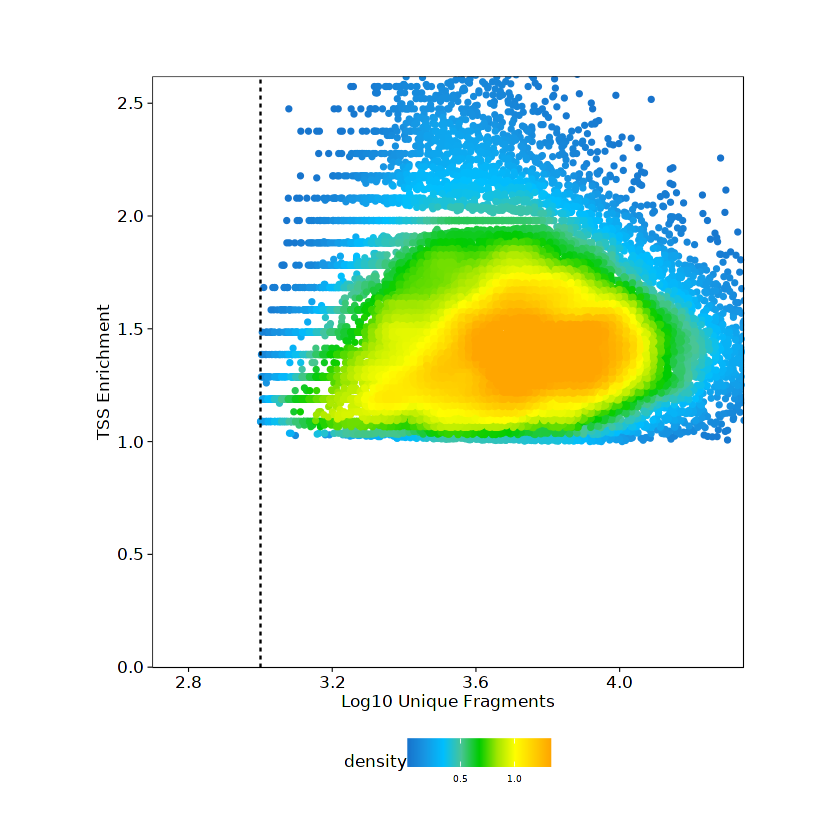

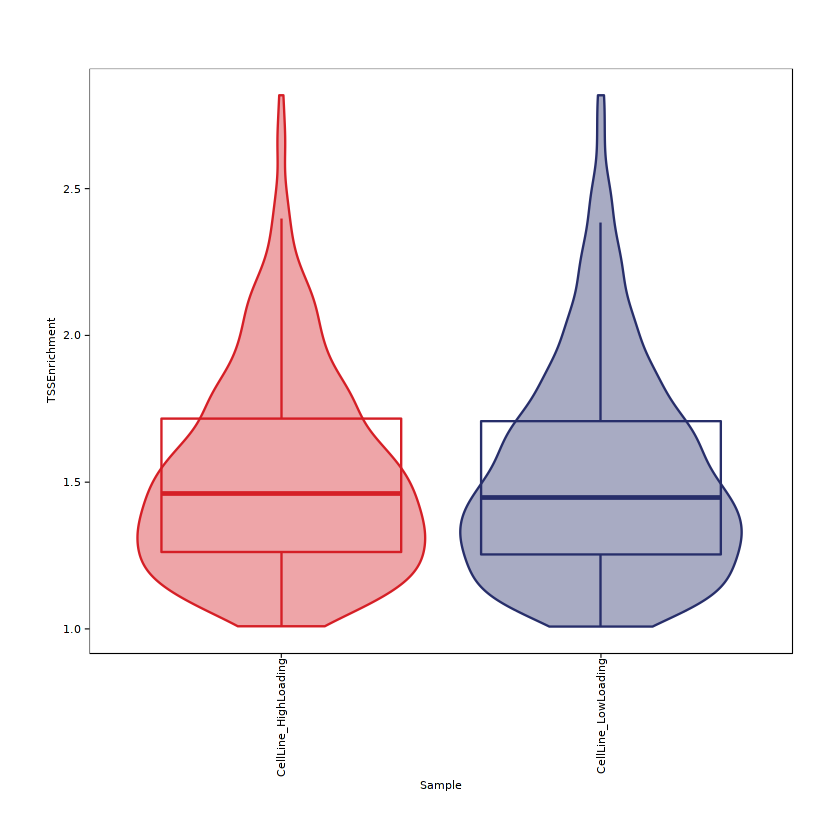

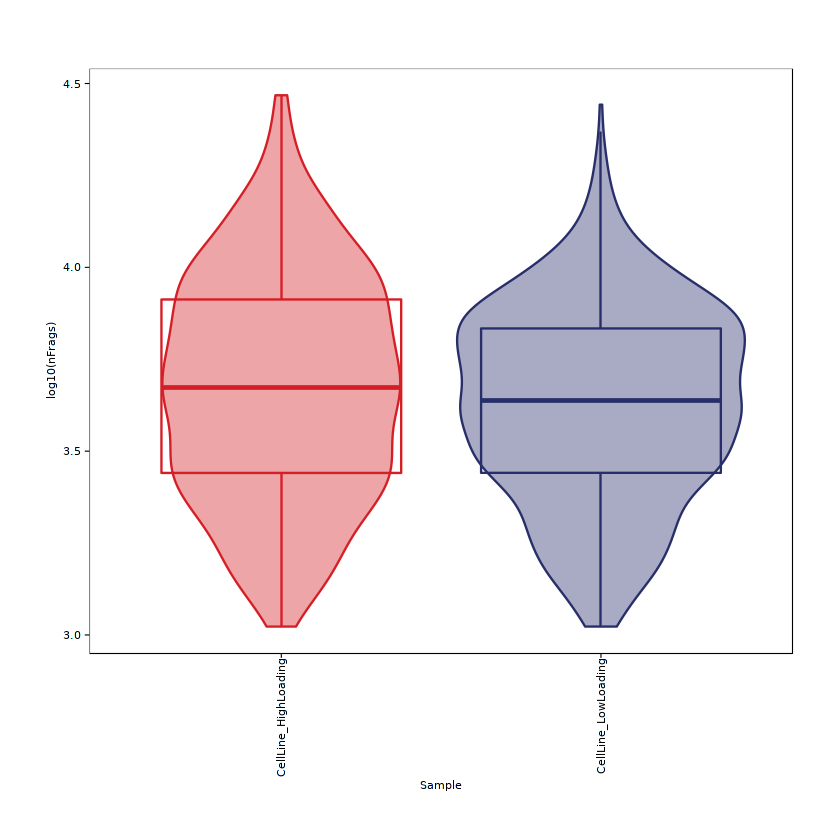

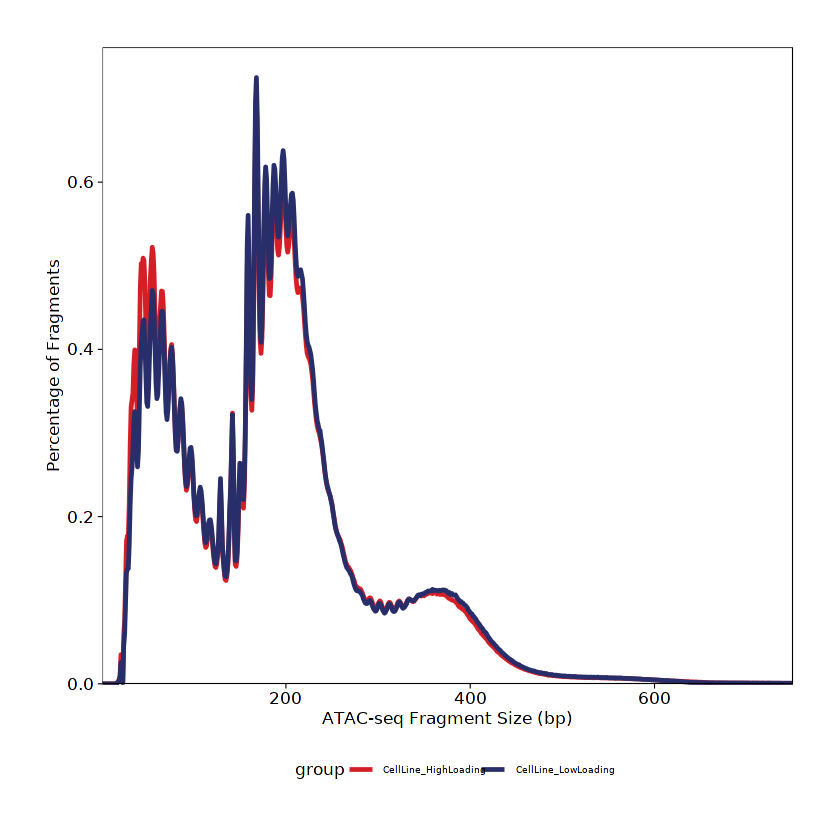

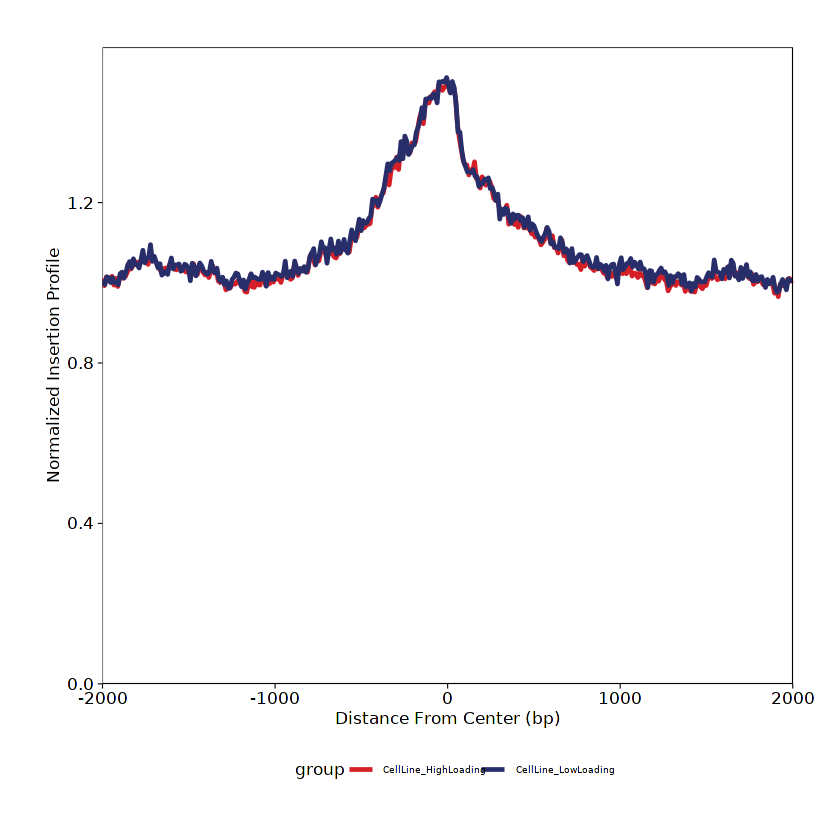

In [13]:
p1 
p2
p3
p4
p5

In [14]:
# plot to a pdf file
plotPDF(p1,p2,p3,p4,p5, name = "Plot-QC.pdf", ArchRProj = projCellMix2, addDOC = FALSE, width = 5, height = 5)

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!



In [23]:
# Output passed cell id
df_QC[rownames(df_QC) %in% rownames(getCellColData(projCellMix2)),"QC"] <- "passed"

In [28]:
head(df_QC)

,cell_id,QC
,<chr>,<chr>
CellLine_HighLoading#CGCGCAACAAGCTTTG-1,CellLine_HighLoading#CGCGCAACAAGCTTTG-1,doublet
CellLine_HighLoading#CAGGATTTCCATCATT-1,CellLine_HighLoading#CAGGATTTCCATCATT-1,doublet
CellLine_HighLoading#CCACAGGCAACGACAG-1,CellLine_HighLoading#CCACAGGCAACGACAG-1,doublet
CellLine_HighLoading#CCGCATTGTCTCTAAG-1,CellLine_HighLoading#CCGCATTGTCTCTAAG-1,passed
CellLine_HighLoading#GTTCAAGCATGGGTGA-1,CellLine_HighLoading#GTTCAAGCATGGGTGA-1,passed
CellLine_HighLoading#TTGCGAAGTACTTCAG-1,CellLine_HighLoading#TTGCGAAGTACTTCAG-1,passed


In [27]:
dim(df_QC)

[1] 570440      2

In [26]:
table(df_QC$QC)
# filtered_out: filtered by TSS enrichment score and #unique fragments


     doublet filtered_out       passed 
        6460       543319        20661 

In [31]:
df_keep <- df_QC[df_QC$QC == "passed",]
dim(df_keep)

[1] 20661     2

In [32]:
write.table(df_keep, file='Cell_id_keep_ArchR.txt', sep='\t', quote = FALSE, row.names=FALSE)
# Output only cells passed QC and doublet filtering

In [33]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.10.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.10.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] nabor_0.5.0                       sp_1.4-6                         
 [3] SeuratObject_4.1.1                Seurat_4.1.1           